<a href="https://colab.research.google.com/github/70shakeel/DecisionTreeAssignment/blob/master/Neural%20Network%20Classifier%20for%20Breast%20Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from skimage.transform import pyramid_gaussian
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [0]:
x_train = pd.read_csv(r'/content/drive/My Drive/IML Assignment 2/xtrain.csv')
y_train = pd.read_csv(r'/content/drive/My Drive/IML Assignment 2/ytrain.csv')

x_test = pd.read_csv(r'/content/drive/My Drive/IML Assignment 2/xtest.csv')
y_test = pd.read_csv(r'/content/drive/My Drive/IML Assignment 2/ytest.csv')


In [3]:
x_train.shape

(454, 30)

In [4]:
len(y_train)

454

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
x_train.shape

(454, 30)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
classifier = Sequential([
    Dense(32, input_shape=(30,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [0]:
classifier.add(Dense(units = 5, activation = 'relu', input_dim=9))
classifier.add(Dense(units = 3, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [0]:
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [24]:
classifier.fit(x_train, y_train, epochs = 100)

Epoch 1/100
454/454 [==============================] - 0s 120us/step - loss: 0.1136 - acc: 0.9670
Epoch 2/100
454/454 [==============================] - 0s 78us/step - loss: 0.1006 - acc: 0.9736
Epoch 3/100
454/454 [==============================] - 0s 72us/step - loss: 0.0889 - acc: 0.9802
Epoch 4/100
454/454 [==============================] - 0s 82us/step - loss: 0.0782 - acc: 0.9824
Epoch 5/100
454/454 [==============================] - 0s 77us/step - loss: 0.0684 - acc: 0.9846
Epoch 6/100
454/454 [==============================] - 0s 74us/step - loss: 0.0600 - acc: 0.9868
Epoch 7/100
454/454 [==============================] - 0s 71us/step - loss: 0.0525 - acc: 0.9868
Epoch 8/100
454/454 [==============================] - 0s 69us/step - loss: 0.0460 - acc: 0.9868
Epoch 9/100
454/454 [==============================] - 0s 65us/step - loss: 0.0405 - acc: 0.9890
Epoch 10/100
454/454 [==============================] - 0s 67us/step - loss: 0.0360 - acc: 0.9890
Epoch 11/100
454/454 [======

In [25]:
y_pred = classifier.predict(x_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred]
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  4]
 [ 2 44]]


0.9469026548672567


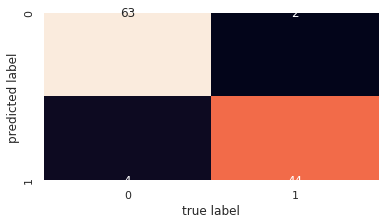

In [32]:

print(accuracy_score(y_test, y_pred))


mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');